In [1]:
%%html
<link rel="stylesheet" type="text/css" href="./files/style.css">

# UCL BIOC0016 - Bioinformatics
Alan R. Lowe (a.lowe@ucl.ac.uk)

---

### Bioimage informatics / Machine learning

The aim of the exercises in this notebook is to familiarise you with the different steps of evaluating the performance of a simple convolutional neural network (CNN). You will use a real CNN to classify different cell states using image data provided to you. A more sophisticated version of this neural network has been used in recently published research. The architecture of the network is similar to those you will have learnt about in the lectures.

The network is able to tell whether a cell is proliferating or dead.  This could be useful to understand whether a drug is effective or not, or to understand the normal cellular behaviour.

The CNN has been pre-trained on a dataset of real images from data collected at UCL. This is a very simple CNN, and you are going to assess the performance of it by making predictions of the cell state using image data, and comparing these with your ground truth annotation.  The images that you are provided with are called a 'hold out' set, since they have come from the much larger original data set, but have not been used to train the neural network. The CNN has not 'seen' these data during the training phase, and therefore represent a real test of the performance of the network.  

The practical contains following sections:

1. Data annotation
2. Make predictions with a convolutional neural network
3. Compare these with the data that you have annotated
4. Determine the accuracy of the model

### Instructions

Code sections are coloured according to the following scheme:

* <div class="task_red"> Code that needs to be written by you. </div>
* <div class="task_blue"> Code that needs to be edited by you, perhaps changing some parameters. </div>
* <div class="task_green"> A task that needs to be completed by you. This may be recording the results. </div>


### IMPORTANT NOTES:

1. This notebook will 'timeout' if you do not interact with it for more than 10-20 minutes. Make sure you save your progress occasionally.
2. If the colors above are not showing, you can run the first line of the notebook.

### Be part of the research project!

This is based on a real research project, and you can contribute to the project by recording your results as part of the practical. You can read more about the research project [here](http://lowe.cs.ucl.ac.uk/cellx.html).

As you complete different sections of the practical, we ask you to complete different sections of a google form. By recording the results, you can contribute to the research programme.

### Further reading
* http://lowe.cs.ucl.ac.uk/cellx.html
* https://en.wikipedia.org/wiki/Bioimage_informatics
* https://teachablemachine.withgoogle.com/train/image
* https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

---
# Beginning of the practical


---
## PART 1 - Data Annotation


To test how well the neural network is able to perform on unseen images, we need to manually annotate some new and unseen images with a label. We can then analyse how many labels the neural network correctly predicts. In this section, you will be provided with a random sample of unlabeled images. You will need at least 50, although the more the better. Using the guide below, please annotate each image with one of the six labels provided. If you are unsure, use the 'Unknown' label.

Here are some examples of cells and their corresponding labels:

![Cell_state_labels](./files/cell_states.png "Cell state labels")

### Set up plotting and import some useful libraries

We first need to load some libraries of code that will help with the data processing and visualization. If you are more experienced at Python, you can read the code for the `helpers` library at [github](https://github.com/quantumjot/BIOC0016-MachineLearning).

In [2]:
%matplotlib inline

import helpers
import numpy as np

### Get a sample of images from the test dataset

Next, we need to get a random sample of images from the dataset. The dataset has thousands of images in it. The first command `images = helpers.get_example_images()` uses the `helpers` library to call a function `get_example_images`. This requests images from the dataset and places them in a list called `images`.

The second command `helpers.plot_images()` takes the list of images as an argument and plots them in the notebook, showing the unique ID numbers above them.

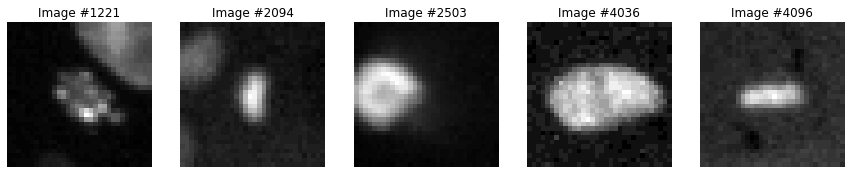

In [3]:
images = helpers.get_example_images(num_images=5)
helpers.plot_images(images)

<div class="task_blue"> <b>TASK</b>: Try changing the number of images. For the remainder of the practical, you will need at least 50 images.</div>

Now that you have your own sample of images, you need to annotate them to create the **ground truth**. You will store these annotations using two Python data structures, a `list` and a `dictionary`.

A `list` is just what it sounds like, a sequence of items in order. A list can have multiple entries (separated by commas), or be empty:
```python
list_of_numbers = [0, 1, 2, 3, 4]
empty_list = []
```

A `dictionary` stores key-value pairs.

The final data structure may look something like this:

```python 
annotation = {'interphase': [0,5,3,20], 
              'prometaphase': [7,2], 
              'metaphase': [14,33,6], 
              'anaphase': [508,1], 
              'apoptosis': [8], 
              'unknown': []}```

<div class="task_red">
    <b>TASK:</b> Complete the annotation dictionary. To do this you will need to make a list of the image numbers, and your best guess as to the label that each image should have. Once you have this, compile the information into a dictionary structure, and run the validation to make sure that the annotation format is correct. If you have correctly formatted the result it will return True. If it is incorrect, it will return a list of errors that need to be corrected.
</div>

In [4]:
annotation = {}

In [5]:
# validate the annotation
helpers.validate_annotation(annotation)

ValueError: Validation failed

<div class="task_green">
    <b>TASK:</b> If the validation returns True, Complete sections 1 and 2 of the <a href="https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform">Google form</a>, to record the annotations you have made.
</div>

<br />

If your annotation has validated `True`, you can now assign these annotations to the images:

In [ ]:
helpers.annotate_images(images, annotation)

---
## PART 2 - Using the CNN to make predictions

### Loading the pre-trained model

In the following lines of code `helpers.load_CNN_model()` builds the convolutional neural network (CNN) that we will test, and sets the weights and biases using the pretrained values. This model has been trained with thousands of images, but the network is very simple. The goal is to assess the performance of the network.

In [ ]:
model = helpers.load_CNN_model()

<div class='task_red'> <b>TASK:</b> Summarise the model and get the number of parameters. Answer the following questions:
    <ul>
        <li>How many convolutional layers are there? </li>
        <li>How many kernels are used in each convolutional layer? </li>
        <li>How many output classes are there? </li>
        <li>What is the size of the input image, and after the convolutional layers?</li>
    </ul>
</div>

**HINT**: You can use the command `model.summary()` to get the details of the model.

### Visualise activations within the network

When the network is given an example, we can visualize the activations within the layes of the network from the sample. To visualize the activations within the network, you can use the `helpers.visualize_layers()` command.

To do this, the function needs three (3) arguments:
```python
helpers.visualize_layers(model, image, layer)
```

You can only use one image at a time, so you need to pass just one image as an argument. You could do this by selecting the first image (0) or the second (1), third (2) etc..:
```python
image = images[0]   # select the first image from the list
```

<br />

<div class='task_red'><b>TASK:</b> visualize the activations within the network for the first and second convolutional layers (layer=0 or layer=1). What can you see? </div>

### Make the predictions


Now that we have loaded the pre-trained model. We can feed it the same images that you have labeled and generate predictions for the label. The predictions are returned as the probability of the label given the image data, $\text{P}(\text{label} | \text{data})$. In fact, the model returns the probability for *all* labels given the data.

<br />
<div class="task_blue"> <b>TASK:</b> Using the model, make predictions for the images that you have annotated.</div>

In [ ]:
images_for_prediction = np.concatenate([im.as_tensor() for im in images], axis=0)
predictions = model.predict(images_for_prediction)

You can use the command `print()` to print the predictions to the screen.  Since `predictions` is a 2D array, it also has a shape. You can access the shape information using the `.shape` property.

<br />

<div class='task_blue'><b>TASK:</b> Print the predictions to the screen. Why is the output this shape?</div>

---
## PART 3 - Compare the predictions with your annotations

We can visualize the images and their predictions using one of the helper functions:

<div class='task_blue'><b>TASK:</b> Print out the predictions from the model using the helper functions below. How well do they compare to the annotations you have made? Which predictions is the model confident in, and which ones are less confident? </div>

**HINT:** You can use the following helper functions to do this:
`helpers.plot_predictions(images, predictions)` and `helpers.print_predictions(images, predictions)`

### Calculate the confusion matrix

A *confusion matrix* is used to assess how well a multi-label classifier performs. The matrix is square; it has the same number of rows and columns, $n \times n$, where $n$ is the number of classes.

By definition, a confusion matrix $\mathbf{C}$ is such that $\mathbf{C}_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

If the predictions for every label were correct, i.e. all predictions equal the ground truth, then all of the entries will be on the diagonal of the matrix:

![Confusion_matrix](./files/confusion.png "Confusion matrix")

<div class='task_blue'><b>TASK: </b> Use the helper function `calculate_confusion_matrix` to create the confusion matrix. </div>

In [ ]:
confusion_matrix = helpers.calculate_confusion_matrix(images, predictions)

In [ ]:
print(confusion_matrix)

In [ ]:
confusion_matrix.plot()

<div class='task_blue'><b>TASK:</b> Did the model perform better with some labels than others? Which performed best, and which worst?</div>

---
## PART 4 - Calculate the accuracy of the model using your ground truth data

We need to determine the overall accuracy of the model. We will make several simple calculations:


1. **Accuracy** is a single number that captures the fraction of true predictions among the total number of examples examined.
2. **Precision** is the fraction of correct label $i$ out of all instances where the model predicted a label $i$.  Precision is a good metric when we want to be very sure that our model is making correct predictions.
3. **Recall** is the fraction of correct label $i$ out of all instances where the true label is $i$. Recall is a good metric when we want our model to capture as many positives predictions as possible.

It's important to think about all of these metrics. Ideally we would want our model to correctly predict the label (precision) and to label all occurences (recall).

<div class='task_red'><b>TASK:</b> Calculate the overall accuracy of the model, by counting the total number of correct labels divided by the total number of examples you annotated. Use the information in confusion matrix to help you. How well does the model perform?</div>

<div class='task_green'>
    <b>TASK: </b> Complete section 3 of the <a href="https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform">Google form</a>. 
</div>

<div class='task_red'><b>TASK:</b> Try calculating the precision and recall using the confusion matrix.
<ul>
    <li>Precision is the number of correct labels (on the diagonal of the confusion matrix) divided by the sum of the column </li>
    <li>Recall is the number of correct labels (on the diagonal of the confusion matrix) divided by the sum of the row </li>
</ul>
</div>

#### F1-score

The final metric we will calculate is called the $F_1$-score. This metric tries to balance the precision and recall into a single score, for each label of the classifier.  This is important to enable us to assess the performance of the model and determine whether it works well enough for our purposes, or to compare different models.

We will now write our own function to calculate the $F_1$-score for each of the labels. A *function* is a block of code that takes some inputs (*arguments*) and performs a task, often returning a result. For example, a function that calculates the value of $y$ for a straight line $y=mx+c$ may look something like this:

```python
def straight_line(m, x, c):
    y = m*x + c
    return y
```

The `def` keyword means that we are defining a function. This is followed by the function name, which is `straight_line` in this case, with the arguments `(m, x, c)` in that order. The remainder is simply the calculation. The `return` keyword, returns the result `y` to the user.

One can use the function as follows:
```python
y = straight_line(1, 10, 0)
print(y)
```

which returns the result: `10`

You will need to create a function below, that calculates the $F_{1}$ score, according to the following equation:

\begin{equation}
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

<br />

<div class='task_red'><b>TASK:</b> Complete the function below to calculate the F1 score for each class </div>

In [ ]:
def F1_score(recall, precision):
    """ Function to calculate the F1-score. You need to complete the function below. """
    score = 
    return score

<div class='task_blue'><b>TASK:</b> Now perform the calculation by running the code block below. Does the calculation work? </div>

In [ ]:
for recall, precision, label in confusion_matrix:
    score = F1_score(recall, precision)
    print(f'{label:<12} --> recall: {recall:.2f}, precision: {precision:.2f}, F1-score: {score:.2f}')

The results here demonstrate how well the model is performing, by assessing the $F_1$-score for each class within our dataset. You will see that the model performs better for some classes than others. This may mean that we need to add more training data, improve our annotations, or try alternative neural network architectures. What would you do next?

If you would like to learn more about the research underpinning this practical, you can read more here:
http://lowe.cs.ucl.ac.uk/cellx.html

<br />

<div class="task_green">
    <b>TASK:</b> Please download and save your notebook and make sure you have completed the <a href="https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform">Google form</a> and uploaded your results. If you have any feedback about the practical, please record it in the form. </div>

# End of the practical
---